# Machine Vision 2022/23 - Assignment 4: Colors and Segmentation

In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.color

#### Part 1: Color Spaces

In this exercise, we want to understand different color spaces.

In [2]:
# @student: load the image stored under "res/flower.png"
input_img = skimage.io.imread("res/flower.png")

# @student: convert the image into float representation (from 0-255 to 0.0-1.0)
input_img = input_img / 255
assert input_img.dtype == float, "incorrect conversion to float"
assert np.min(input_img) >= 0.0, "incorrect conversion to float"
assert np.max(input_img) <= 1.0, "incorrect conversion to float"

To achieve a better understanding of the different color spaces, we want to understand their individual channels.
For this purpose, we will plot the channels individually.

You are free to change the `input_img` variable to a different image provided in the `res` directory.

##### RGB Color Space
The RGB color space has three additive channels, where each channel represents one color.

<br>
<img src="res/rgb.png" width="350">

This figure visualizes the `RGB` color space.
 - `R` (channel 0) represents the color red.
 - `G` (channel 1) represents the color blue.
 - `B` (channel 2) represents the color green.

In [3]:
rgb = np.arange(27).reshape((3, 3, 3))
a = rgb[:, 2]
rgb[:, 1] = 0
rgb[:, 1] = a
rgb[:, 1]

array([[ 6,  7,  8],
       [15, 16, 17],
       [24, 25, 26]])

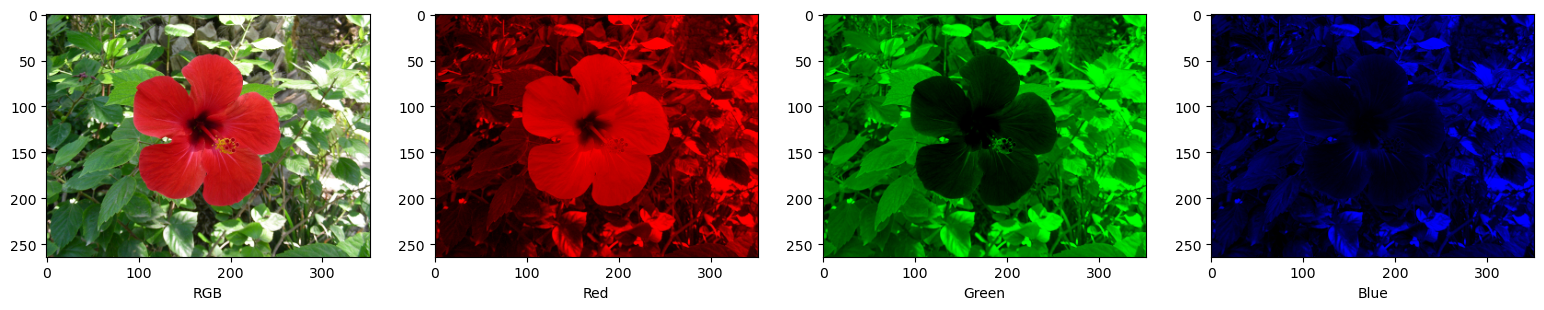

In [4]:
def extract_rgb_dim(*, img_rgb: np.ndarray, channel: int) -> np.ndarray:
    img_rgb_channel = copy.deepcopy(img_rgb)

    # @student: mask all values in the image that are not in the desired channel with 0
    #           hint: image shape is [v, u, c]
    # img_rgb_channel = img_rgb_channel[:, :, channel]
    img_rgb_channel[:, :, 0:channel] = 0
    img_rgb_channel[:, :, channel+1:] = 0
    return img_rgb_channel

input_img_r = extract_rgb_dim(img_rgb=input_img, channel=0)
input_img_g = extract_rgb_dim(img_rgb=input_img, channel=1)
input_img_b = extract_rgb_dim(img_rgb=input_img, channel=2)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(input_img)
ax1.set_xlabel("RGB")
ax2.imshow(input_img_r)
ax2.set_xlabel("Red")
ax3.imshow(input_img_g)
ax3.set_xlabel("Green")
ax4.imshow(input_img_b)
ax4.set_xlabel("Blue")
plt.show()

##### HSV Color Space

The HSV color space contains three channels.

<br>
<img src="res/hsv.png" width="350">

This figure visualizes the `HSV` color space.
 - `H` (channel 0) represents the hue of the color.
 - `S` (channel 1) represents the saturation. The higher the saturation, the "stronger" the color.
 - `V` (channel 2) represents the luminance.


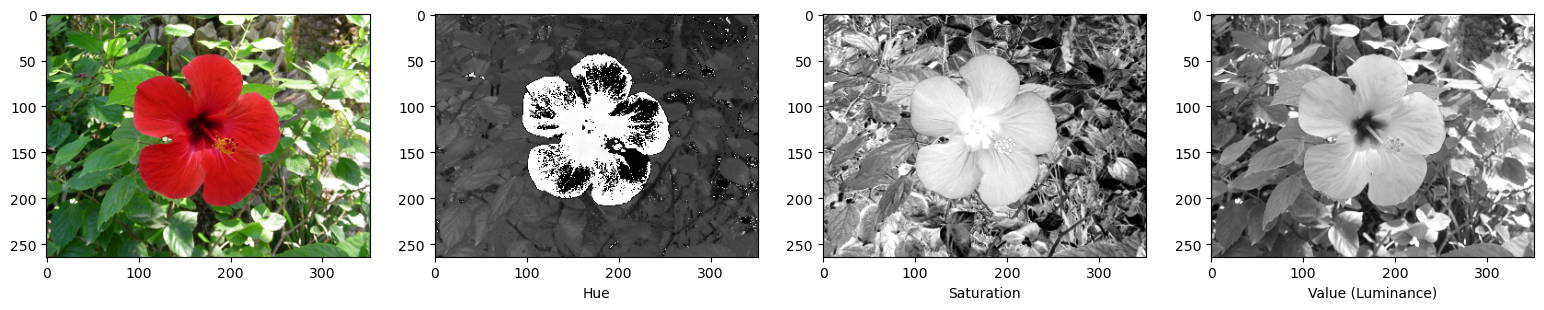

In [5]:
# @student: convert the image color space from rgb to hsv
#           hint: the skimage package (skimage.color) has different functions to convert between color spaces
flower_img_hsv = skimage.color.rgb2hsv(input_img)
def extract_hsv_dim(img_hsv: np.ndarray, channel: int) -> np.ndarray:
    return img_hsv[:,:,channel]

flower_img_h = extract_hsv_dim(img_hsv=flower_img_hsv, channel=0)
flower_img_s = extract_hsv_dim(img_hsv=flower_img_hsv, channel=1)
flower_img_v = extract_hsv_dim(img_hsv=flower_img_hsv, channel=2)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(input_img)
ax2.imshow(flower_img_h, cmap="gray")
ax2.set_xlabel("Hue")
ax3.imshow(flower_img_s, cmap="gray")
ax3.set_xlabel("Saturation")
ax4.imshow(flower_img_v, cmap="gray")
ax4.set_xlabel("Value (Luminance)")
plt.show()

##### LAB Color Space

The LAB color space contains three channels.

<br>
<img src="res/lab.png" width="350">

(Von Holger Everding - Eigenes Werk, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=38422442)

This figure visualizes the `HSV` color space.
 - `L` (channel 0) represents the luminance.
 - `a` (channel 1) represents the color from green to red.
 - `b` (channel 2) represents the color from blue to yellow.

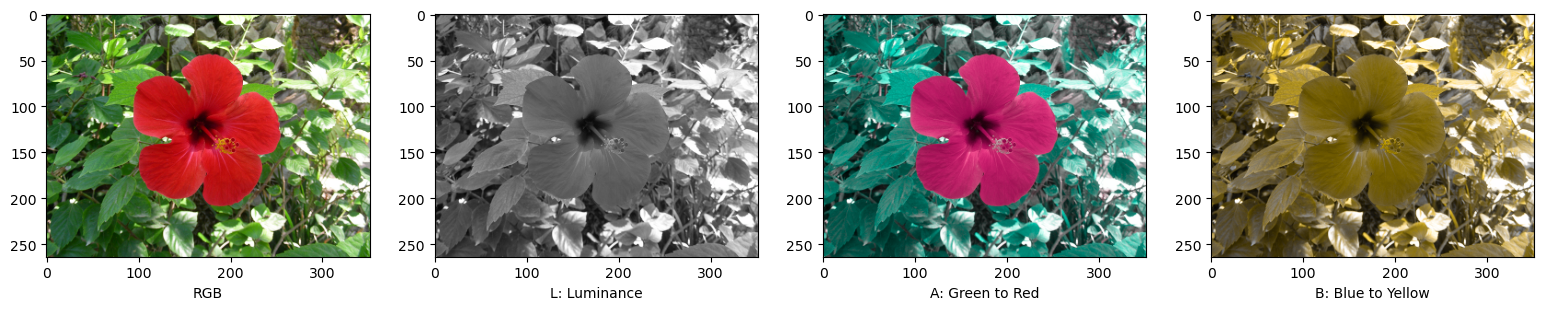

In [6]:
# @student: convert the image color space from rgb to lab
#           hint: the skimage package (skimage.color) has different functions to convert between color spaces
input_img_lab = skimage.color.rgb2lab(input_img)

def extract_lab_dim(img_lab: np.ndarray, channel: int) -> np.ndarray:
    img_lab_channel = copy.deepcopy(img_lab)

    # @student: always keep the luminance channel but hide other channels depending on the
    #           channel argument
    if channel==0:
        img_lab_channel[:, :, 1:] = 0
    elif channel==1:
        img_lab_channel[:, :, 2] = 0
    else:
        img_lab_channel[:, :, 1] = 0

    # Channel "a" ranges from green to red, while Channel b ranges from blue to yellow.
    # Therefore, we cannot display the channels using a gray scale image and have to convert the channel
    # back to an RGB image
    #
    # @student: convert to the lab image back to rgb color space
    #           hint: the skimage package has different functions to convert between color spaces
    img_rgb_channel = skimage.color.lab2rgb(img_lab_channel)
    return img_rgb_channel

input_img_l = extract_lab_dim(img_lab=input_img_lab, channel=0)
input_img_a = extract_lab_dim(img_lab=input_img_lab, channel=1)
input_img_b = extract_lab_dim(img_lab=input_img_lab, channel=2)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(input_img)
ax1.set_xlabel("RGB")
ax2.imshow(input_img_l)
ax2.set_xlabel("L: Luminance")
ax3.imshow(input_img_a)
ax3.set_xlabel("A: Green to Red")
ax4.imshow(input_img_b)
ax4.set_xlabel("B: Blue to Yellow")
plt.show()

#### Part 2: Segmentation using CCL

Implement the CCL algorithm for segmenting an image.
Use the euclidean distance in RGB color space as similarity measure.

In [38]:
a = np.arange(60).reshape((4, 5 ,3))
np.where(a < 10)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3]),
 array([0, 1, 2, 0, 1, 2, 0, 1, 2, 0]))

True

[0.41960784 0.55686275 0.62745098]


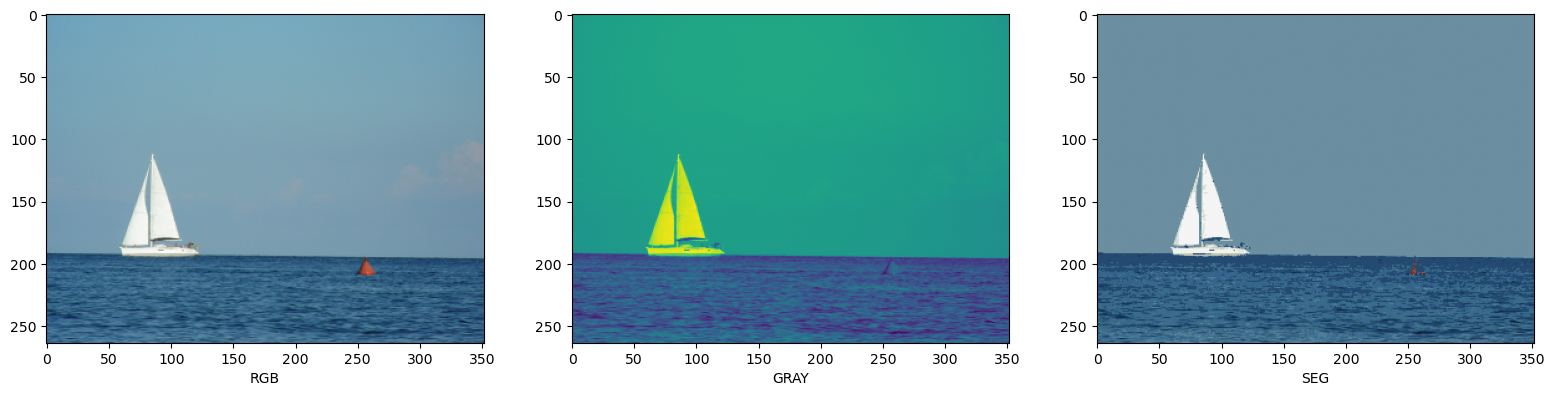

In [46]:
def similarity_measure(*, p1: np.ndarray, p2: np.ndarray) -> float:
    # @student: calculate the euclidean distance between p1 and p2
    delta_p = p1 - p2
    distance = np.sqrt(delta_p[0]**2+delta_p[1]**2+delta_p[2]**2)

    return distance

def get_pixel(*, image: np.ndarray, u: int, v: int) -> np.ndarray:
    if v < 0:
        return None

    if u < 0:
        return None

    return image[v, u]

def ccl_segmentation(*, image: np.ndarray, threshold: float) -> np.ndarray:
    segmented_image = np.zeros_like(image)

    for v in range(image.shape[0]):
        for u in range(image.shape[1]):
            pixel = get_pixel(image=image, u=u, v=v)
            pixel_left = get_pixel(image=image, u=u-1, v=v)
            pixel_top = get_pixel(image=image, u=u, v=v-1)

            left_same = False
            if pixel_left is not None:
                left_same = similarity_measure(p1=pixel, p2=pixel_left) < threshold
            top_same = False
            if pixel_top is not None:
                top_same = similarity_measure(p1=pixel, p2=pixel_top) < threshold


            # Case 1: Left: similar color, Top: different color
            if left_same == True and top_same == False:
                segmented_image[v, u] = segmented_image[v, u-1]
                continue

            # Case 2: Left: different color, Top: similar color
            if left_same == False and top_same == True:
                segmented_image[v, u] = segmented_image[v-1, u]
                continue

            # Case 3: Left: different color, Top: different color
            if left_same == False and top_same == False:
                segmented_image[v, u] = image[v, u]
                continue
                # print(segmented_image[0, 0])

            # Case 4 + 5: Left: similar color, Top: similar color
            segment_left = segmented_image[v, u - 1]
            segment_top = segmented_image[v - 1, u]
            if left_same and top_same and np.array_equal(segment_left, segment_top):
                # Case 4: Same Segments
                segmented_image[v, u] = segment_left
            else:
                # Case 5: Different Segments
                segmented_image[v, u] = segment_left
                index = np.where(segmented_image == segment_top)
                # print(index)
                segmented_image[index[0], index[1]] = segment_left

    return segmented_image

# @student: first load the boat image and convert the image into float representation (from 0-255 to 0.0-1.0)
img_boat_rgb = skimage.io.imread('res/boat.png')
img_boat_rgb = img_boat_rgb / 255
img_boat_gray = skimage.color.rgb2gray(img_boat_rgb)

# @student: apply the ccl algorithm to the image and visualize the results
#           test different values for the threshold hyperparameter
segmented_image = ccl_segmentation(image=img_boat_rgb, threshold=0.02)


_, (ax1, ax2, ax3) = plt.subplots(1, 3)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(img_boat_rgb)
ax1.set_xlabel("RGB")
ax2.imshow(img_boat_gray)
ax2.set_xlabel("GRAY")
ax3.imshow(segmented_image)
ax3.set_xlabel("SEG")

print(segmented_image[0, 0])
# print(img_boat_rgb)

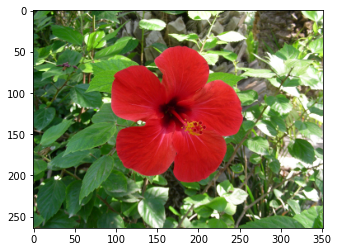

In [ ]:
|# @student: apply the ccl algorithm to the remaining images in the "res" directory
#           test different thresholds to obtain good results

...

#### Part 3: Segmentation using K-Means

Implement the K-means algorithm for segmenting an image.

In [69]:
a = np.random.randn(2, 4, 7)
b = np.argmin(a, axis = -1)
b

array([[0, 6, 6, 3],
       [6, 3, 6, 1]])

In [70]:
a[np.where(b == 6)]

array([[ 0.62643995, -0.35264522,  0.76500846,  0.6453963 ,  0.46922678,
         1.34395286, -0.35373366],
       [-0.78029845,  0.4528138 , -1.37161096, -0.85444298, -0.29203084,
        -1.13152454, -1.75482898],
       [ 0.82621754, -1.08855199, -0.91262221, -0.41994062, -1.24116434,
         0.20129778, -1.27385729],
       [ 0.19864242, -1.03034325,  0.7535458 , -0.8504169 , -0.3814197 ,
        -0.04613408, -1.32069491]])

In [84]:
def calculate_random_centroids(*, image: np.ndarray, k: int) -> np.ndarray:
    # @student: create k centroids based on random pixels within the image
    v = image.shape[0]
    u = image.shape[1]
    index = np.arange(u * v)
    k_index = np.random.choice(index, size=k, replace=False)
    k_centroids = np.zeros((k, 3))
    for i, idx in enumerate(k_index):
        k_centroids[i] = image[idx % v, idx // u]
    # print(k_centroids)
    return k_centroids


def calculate_distance(*, image: np.ndarray, centroids: np.ndarray) -> np.ndarray:
    # @student: for each pixel calculate the distance to each centroid
    # hint: the result should have the shape [v, u, k], where v and u are the pixel
    #       coordinates and k is the centroid
    #
    #       you can use the euclidean_distance as distance measure
    v = image.shape[0]
    u = image.shape[1]
    k = centroids.shape[0]
    distance = np.zeros((v, u, k))
    for i in range(k):
        delta_p = image - centroids[i] # (v, u, 3)
        distance[:, :, i] = np.sqrt(np.sum(delta_p**2, axis=2))
    # print(distance)
    return distance


def calculate_new_centroids(*, image: np.ndarray, centroids: np.ndarray, pixel_centroid_matching: np.ndarray) -> np.ndarray:
    new_centroids = np.zeros_like(centroids)
    k = centroids.shape[0]
    for i in range(k):
        index = np.where(pixel_centroid_matching == i)
        new_centroids[i] = np.mean(image[index], axis=(0, 1))
    return new_centroids


def k_means_image_segmentation(*, image: np.ndarray, k: int) -> np.ndarray:
    centroids = calculate_random_centroids(image=image, k=k)

    centroids_changed = True
    while centroids_changed:
        centroid_distances = calculate_distance(image=image, centroids=centroids)

        # @student: Extract the new centroid based on the closest distance per pixel
        pixel_centroid_matching = np.argmin(centroid_distances, axis=-1)  # [v, u]

        new_centroids = calculate_new_centroids(
            image=image,
            centroids=centroids,
            pixel_centroid_matching=pixel_centroid_matching
        )

        # Check if the centroids have changed
        centroids_same = np.all(np.all(centroids == new_centroids, axis=-1))
        centroids_changed = not centroids_same
        # change centroids to new centroids and continue iteration until the centroids converged
        centroids = new_centroids


    segmented_img = np.ndarray(shape=image.shape)
    # @student: create a new image that contains the segmented colors
    centroid_distances = calculate_distance(image=image, centroids=centroids)  # (v, u, k)
    pixel_centroid_matching = np.argmin(centroid_distances, axis=-1)  # (v, u)
    segmented_img[:, :] = centroids[pixel_centroid_matching]
    return segmented_img

Apply the k-means algorithm in different color spaces to different images.
Start by using the `res/boat.png` image. Try to choose a good value for the hyperparameter `k`

Do you notice a difference between the color spaces?

[[[0.33342559 0.19752408 0.07774207 0.46641944 0.0848365 ]
  [0.31323491 0.17928046 0.10028794 0.44645642 0.10412485]
  [0.32257137 0.18766253 0.0882135  0.45532435 0.09238603]
  ...
  [0.28691843 0.15101858 0.11705735 0.41738462 0.09998077]
  [0.29064618 0.15394342 0.11263848 0.42160055 0.09621839]
  [0.28379263 0.14782805 0.12055236 0.41334896 0.0993636 ]]

 [[0.32659863 0.19123428 0.08501758 0.45969416 0.09087553]
  [0.32659863 0.19123428 0.08501758 0.45969416 0.09087553]
  [0.32868735 0.19343314 0.08456415 0.46198009 0.092136  ]
  ...
  [0.29278128 0.15558302 0.11050198 0.42383794 0.093544  ]
  [0.29325363 0.15637178 0.10994389 0.42398305 0.09255234]
  [0.28654298 0.1496889  0.11666255 0.41720035 0.09811762]]

 [[0.33370222 0.19791299 0.07634479 0.46645241 0.08318903]
  [0.33379438 0.19752408 0.07492146 0.46641944 0.07979212]
  [0.34711975 0.21078203 0.06526791 0.48000384 0.07744478]
  ...
  [0.29411765 0.15779137 0.11001381 0.42584696 0.09811762]
  [0.29690185 0.15987308 0.1065339

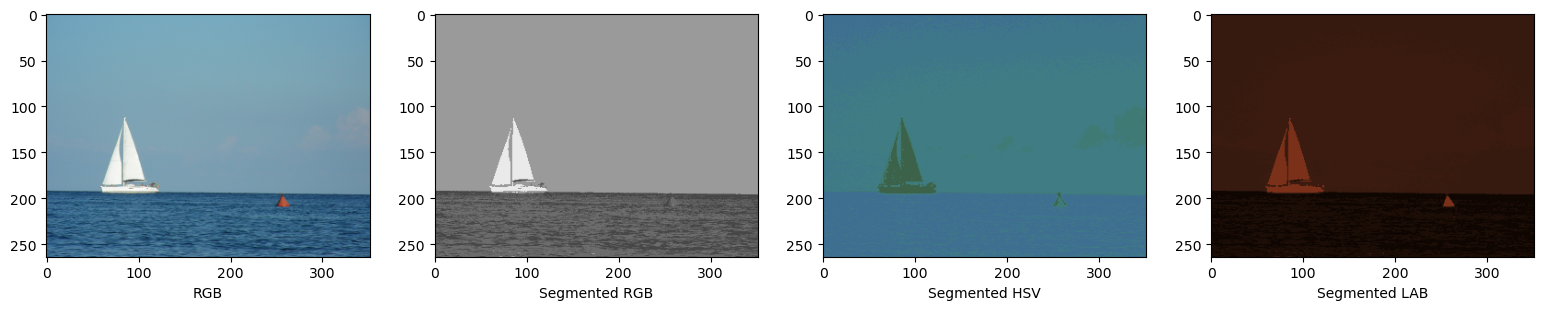

In [85]:
# @student: load the boat image and convert the image into float representation (from 0-255 to 0.0-1.0)
img_kmeans_rgb = skimage.io.imread('res/boat.png') / 255

# @student: try different values for the hyperparameter k
k = 5

# @student: apply k-means in rgb (variable name: segmented_img_kmeans_rgb)
segmented_img_kmeans_rgb = k_means_image_segmentation(image=img_kmeans_rgb, k=k)

# @student: apply k-means in hsv (variable name: segmented_img_kmeans_hsv)
img_kmeans_hsv = skimage.color.rgb2hsv(img_kmeans_rgb)
segmented_img_kmeans_hsv = k_means_image_segmentation(image=img_kmeans_hsv, k=k)
segmented_img_kmeans_hsv_rgb = skimage.color.hsv2rgb(segmented_img_kmeans_hsv)

# @student: apply k-means in lab (variable name: segmented_img_kmeans_lab)
img_kmeans_lab = skimage.color.rgb2lab(img_kmeans_rgb)
segmented_img_kmeans_lab = k_means_image_segmentation(image=img_kmeans_lab, k=k)
segmented_img_kmeans_lab_rgb = skimage.color.lab2rgb(segmented_img_kmeans_lab)

_, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
figure_size = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(3 * figure_size)
ax1.imshow(img_boat_rgb)
ax1.set_xlabel("RGB")
ax2.imshow(segmented_img_kmeans_rgb)
ax2.set_xlabel("Segmented RGB")
ax3.imshow(segmented_img_kmeans_hsv_rgb)
ax3.set_xlabel("Segmented HSV")
ax4.imshow(segmented_img_kmeans_lab_rgb)
ax4.set_xlabel("Segmented LAB")
plt.show()